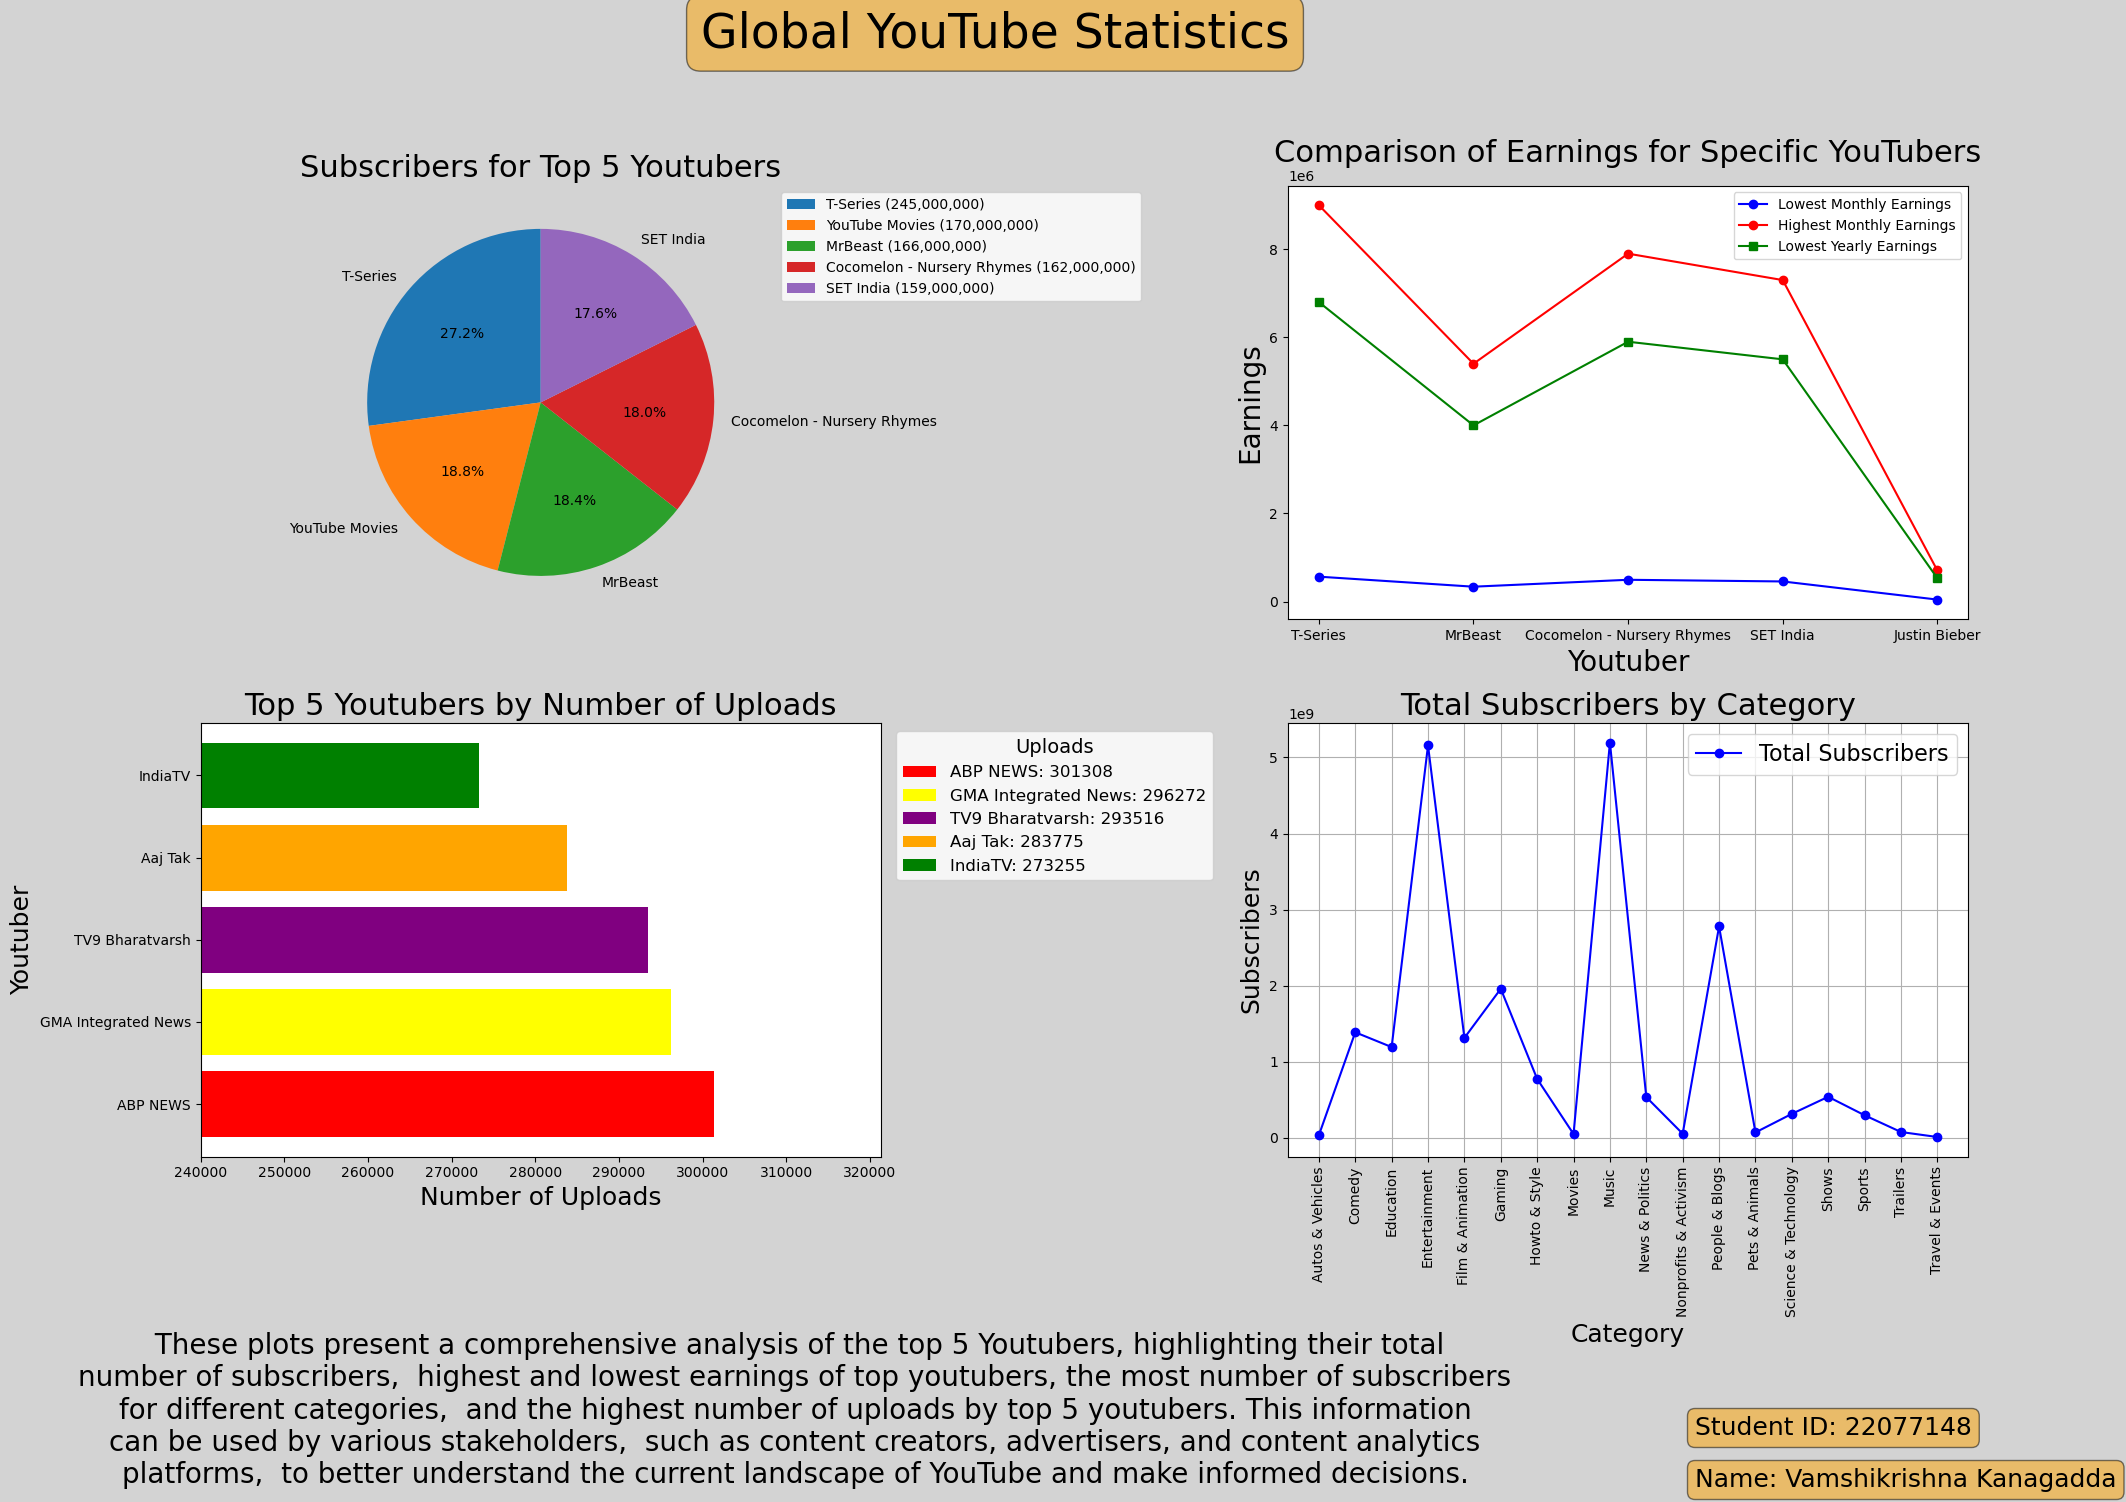

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import textwrap


filepath = "Global YouTube Statistics.csv"

# Read the CSV file into a pandas DataFrame using 'ISO-8859-1' encoding
try:
    df = pd.read_csv(filepath, encoding='ISO-8859-1')
except UnicodeDecodeError:
    print("Error: Unable to decode the file using 'ISO-8859-1' encoding. Try another encoding or check the file format.")
    exit()
# Create subplots in a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(20, 13))
fig.set_facecolor('lightgray')

# Add main title

author_box = dict(boxstyle='round', facecolor='orange',
                  alpha=0.5, edgecolor='black')
fig.suptitle("Global YouTube Statistics", fontsize=34, y=1.04, color='black',
             bbox=author_box)  

# Sorting the DataFrame by subscribers in descending order and extract the top 5
top_5 = df.nlargest(5, 'subscribers')

# Extract the desired columns for the top 5 Youtubers
youtubers = top_5['Youtuber']
subscribers = top_5['subscribers']


# Plot 1: Pie chart for top 5 YouTubers by subscribers
axs[0, 0].pie(subscribers, labels=youtubers, autopct='%1.1f%%', startangle=90)
axs[0, 0].set_title('Subscribers for Top 5 Youtubers', fontsize=22)
axs[0, 0].legend(loc='upper right', bbox_to_anchor=(1, 0, 0.9, 1), labels=[
                 f"{y} ({s:,})" for y, s in zip(youtubers, subscribers)])

# Define the list of specific YouTubers
specific_youtubers = ['Justin Bieber', 'MrBeast',
                      'T-Series', 'Cocomelon - Nursery Rhymes', 'SET India']

# Filter the DataFrame for the specific Youtubers
filtered_df = df[df['Youtuber'].isin(specific_youtubers)]

# Extract the desired columns
youtubers = filtered_df['Youtuber']
lowest_monthly_earnings = filtered_df['lowest_monthly_earnings']
highest_monthly_earnings = filtered_df['highest_monthly_earnings']
lowest_yearly_earnings = filtered_df['lowest_yearly_earnings']

# Plot 2: Line plot for earnings of specific YouTubers
axs[0, 1].plot(youtubers, lowest_monthly_earnings, marker='o',
               label='Lowest Monthly Earnings', color='blue')
axs[0, 1].plot(youtubers, highest_monthly_earnings, marker='o',
               label='Highest Monthly Earnings', color='red')
axs[0, 1].plot(youtubers, lowest_yearly_earnings, marker='s',
               label='Lowest Yearly Earnings', color='green')
axs[0, 1].set_title(
    'Comparison of Earnings for Specific YouTubers', fontsize=22)
axs[0, 1].legend()
axs[0, 1].set_xlabel('Youtuber', fontsize=20)
axs[0, 1].set_ylabel('Earnings', fontsize=20)


# Plot 3: Bar chart for top 5 YouTubers by no of uploads
top_5 = df.nlargest(5, 'uploads')
youtubers = top_5['Youtuber']
uploads = top_5['uploads']
colors = ['red', 'yellow', 'purple', 'orange', 'green']
bars = axs[1, 0].barh(youtubers, uploads, color=colors)
axs[1, 0].set_title('Top 5 Youtubers by Number of Uploads', fontsize=22)
axs[1, 0].set_xlim(240000, max(uploads) + 20000)
axs[1, 0].set_ylabel('Youtuber', fontsize=18)
axs[1, 0].set_xlabel('Number of Uploads', fontsize=18)
axs[1, 0].legend(bars, [f"{y}: {u}" for y, u in zip(youtubers, uploads)], bbox_to_anchor=(
    1.1, 0, 0.4, 1), title="Uploads", title_fontsize="14", loc="upper right", fontsize="12")

# Plot 4: Line plot for total subscribers by category
grouped_data = df.groupby('category')['subscribers'].sum().reset_index()
axs[1, 1].plot(grouped_data['category'], grouped_data['subscribers'],
               marker='o', color='b', linestyle='-', label='Total Subscribers')
axs[1, 1].set_title('Total Subscribers by Category', fontsize=22)
axs[1, 1].tick_params(axis='x', rotation=90)
axs[1, 1].set_xlabel('Category', fontsize=18)
axs[1, 1].set_ylabel('Subscribers', fontsize=18)
axs[1, 1].grid(True)
axs[1, 1].legend(fontsize=16)  # Add this line to display the legend


#  Name and Student ID information
author_box = dict(boxstyle='round', facecolor='orange',
                  alpha=0.5, edgecolor='black')
fig.text(0.85, -0.1, "Name: Vamshikrishna Kanagadda", ha="left",
         va="bottom", fontsize=18, color='black', bbox=author_box)
fig.text(0.85, -0.06, "Student ID: 22077148", ha="left",
         va="bottom", fontsize=18, color='black', bbox=author_box)

# Add the descriptive text below the plots
text = """
These plots present a comprehensive analysis of the top 5 Youtubers, highlighting their total number of subscribers,
 highest and lowest earnings of top youtubers, the most number of subscribers for different categories,
 and the highest number of uploads by top 5 youtubers. This information can be used by various stakeholders,
 such as content creators, advertisers, and content analytics platforms,
 to better understand the current landscape of YouTube and make informed decisions.
"""

fig.text(0.4, -0.09, textwrap.fill(text, width=100),
         horizontalalignment='center', fontsize=20, color='black', wrap=True)


# Adjust layout
plt.tight_layout()
plt.show()
